# Results for MLP for MNIST

In [ ]:
import matplotlib.pyplot as plt
from structure import *


# === Multiple runs example ===

optimizers = [
    make_optimizer_config("PGD", lr=0.01, projection=make_clip_projection(0, 1)),
    make_optimizer_config("PGD", lr=0.01, projection=make_l2_projection(3.0)),
    make_optimizer_config("PGD", lr=0.01, projection=make_binary_projection()),
    make_optimizer_config("PGD", lr=0.01, projection=make_unit_sphere_projection()),
]

optimizers = [
    make_optimizer_config("SGD", lr=0.01),
    make_optimizer_config("GD", lr=0.01),
    make_optimizer_config("Adagrad", lr=0.01),
    make_optimizer_config("Adadelta", lr=1.0),  # pas de lr par défaut
    make_optimizer_config("Momentum", lr=0.01, momentum=0.9),
    make_optimizer_config("Nesterov", lr=0.01, momentum=0.9),
    make_optimizer_config("PartialGD", lr=0.01, update_fraction=0.2),
    make_optimizer_config("PGD", lr=0.01, projection=lambda x: x.clamp(-0.5, 0.5))
]

dataset_list = ["MNIST"]  # tu pourras ajouter "CIFAR10", "FashionMNIST", etc.
model_list = ["MLP"]
results = run_experiments(
    optimizers=optimizers,
    datasets=dataset_list,
    models=model_list,
    epochs=10,
    lr=0.01,
    save_results=True
)



🧪 Running on dataset: MNIST with optimizer: SGD
Epoch 1/10 - Loss: 1.7244 - Accuracy: 0.7959
Epoch 2/10 - Loss: 0.5885 - Accuracy: 0.8817
Epoch 3/10 - Loss: 0.4038 - Accuracy: 0.8963
Epoch 4/10 - Loss: 0.3507 - Accuracy: 0.9082
Epoch 5/10 - Loss: 0.3209 - Accuracy: 0.9147
Epoch 6/10 - Loss: 0.2987 - Accuracy: 0.9211
Epoch 7/10 - Loss: 0.2799 - Accuracy: 0.9246
Epoch 8/10 - Loss: 0.2635 - Accuracy: 0.9274
Epoch 9/10 - Loss: 0.2491 - Accuracy: 0.9328
Epoch 10/10 - Loss: 0.2356 - Accuracy: 0.9343
✅ Results saved to 'results.json'


TypeError: list indices must be integers or slices, not str

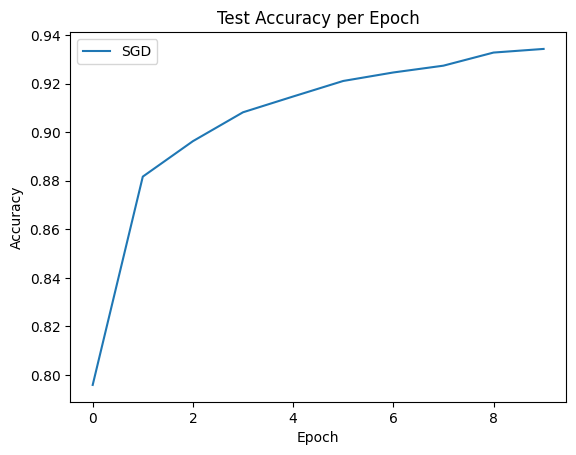

In [4]:


# Optional: plot losses or accuracies
for opt in results:
    plt.plot(opt["accuracies"], label=opt["optimizer"])
plt.title("Test Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()